<a href="https://colab.research.google.com/github/JamesLeeeeeee/ecademy/blob/master/20211117_%EC%9D%B4%EC%9E%AC%EA%B4%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target)=\
keras.datasets.fashion_mnist.load_data()
train_scaled= train_input.reshape(-1, 28, 28, 1)/255.0
train_scaled, val_scaled, train_target, val_target=train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

In [4]:
model= keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2))

In [7]:
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [8]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

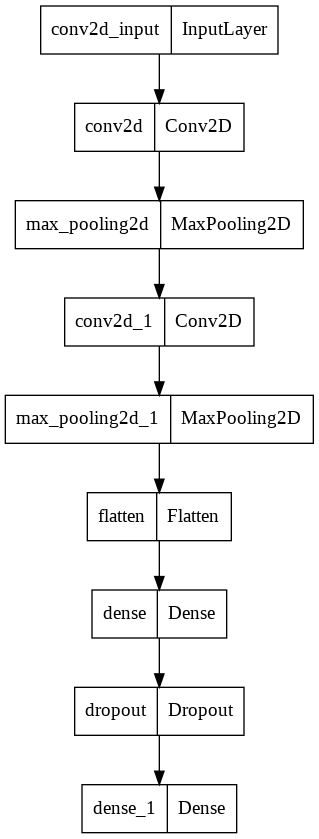

In [11]:
keras.utils.plot_model(model)

In [12]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint=keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only=True)
earlystopping=keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history=model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint, earlystopping])

Epoch 1/20
1500/1500 [==============================] - 64s 42ms/step - loss: 0.5369 - accuracy: 0.8083 - val_loss: 0.3443 - val_accuracy: 0.8733
Epoch 2/20
1500/1500 [==============================] - 62s 41ms/step - loss: 0.3599 - accuracy: 0.8707 - val_loss: 0.2919 - val_accuracy: 0.8909
Epoch 3/20
1500/1500 [==============================] - 63s 42ms/step - loss: 0.3073 - accuracy: 0.8904 - val_loss: 0.2660 - val_accuracy: 0.9024
Epoch 4/20
1500/1500 [==============================] - 62s 41ms/step - loss: 0.2772 - accuracy: 0.9003 - val_loss: 0.2425 - val_accuracy: 0.9109
Epoch 5/20
1500/1500 [==============================] - 62s 41ms/step - loss: 0.2485 - accuracy: 0.9090 - val_loss: 0.2348 - val_accuracy: 0.9125
Epoch 6/20
1500/1500 [==============================] - 63s 42ms/step - loss: 0.2305 - accuracy: 0.9150 - val_loss: 0.2281 - val_accuracy: 0.9148
Epoch 7/20
1500/1500 [==============================] - 62s 41ms/step - loss: 0.2132 - accuracy: 0.9192 - val_loss: 0.2227 -

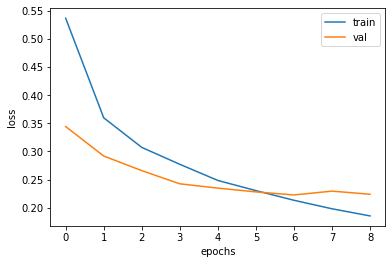

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [16]:
model.evaluate(val_scaled, val_target)


375/375 [==============================] - 4s 12ms/step - loss: 0.2227 - accuracy: 0.9174


[0.22272758185863495, 0.9174166917800903]

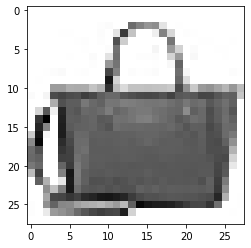

In [17]:
plt.imshow(val_scaled[0].reshape(28,28), cmap='gray_r')
plt.show()

In [18]:
preds= model.predict(val_scaled[0:1])
print(preds)

[[1.7346722e-13 1.6864500e-21 1.1080265e-16 8.1807448e-16 9.3746197e-16
  3.7318674e-17 3.9675454e-14 4.7132906e-19 1.0000000e+00 1.6416809e-21]]


In [19]:
5e3

5000.0

In [20]:
5e-3

0.005

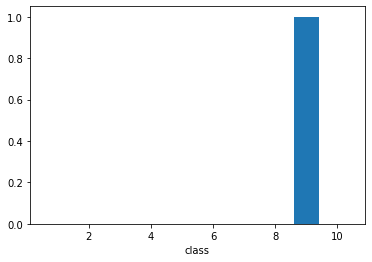

In [21]:
plt.bar(range(1,11),preds[0])
plt.xlabel('class')
plt.show()

In [22]:
classes=['티셔츠', '바지','스웨터','드레스','코트','샌달','셔츠','스니커즈','가방','앵클 부츠']

In [23]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [24]:
test_scaled= test_input.reshape(-1, 28, 28,1)/255.0

In [25]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 4s 12ms/step - loss: 0.2512 - accuracy: 0.9084


[0.25119173526763916, 0.9083999991416931]

In [26]:
from tensorflow import keras
model= keras.models.load_model('best-model.h5')

In [27]:
model.layers

In [28]:
conv=model.layers[0]

In [29]:
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [30]:
conv_weights= conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.014286831 0.2263944


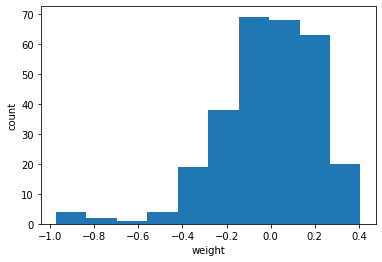

In [32]:
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

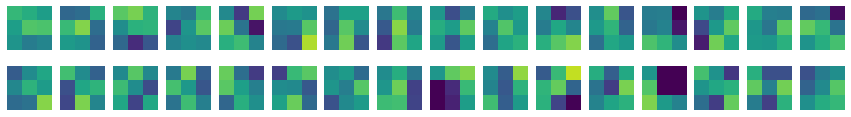

In [33]:
fig , axs= plt.subplots(2,16, figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i, j].imshow(conv_weights[:,:,0,i*16+j],vmin=-0.5, vmax=0.5)
    axs[i, j].axis('off')
plt.show()

In [37]:
no_training_model= keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',padding='same', input_shape=(28,28,1)))

In [40]:
no_training_conv=no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [41]:
no_training_weights= no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

0.0047708154 0.0799582


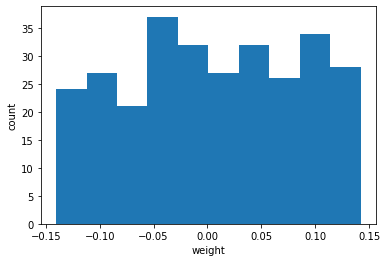

In [42]:
plt.hist(no_training_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

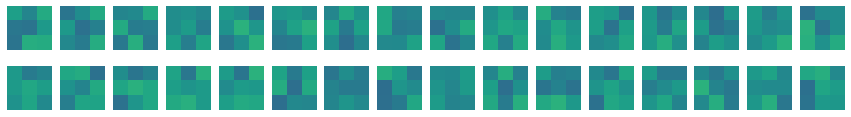

In [43]:
fig, axs= plt.subplots(2,16, figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i, j].imshow(no_training_weights[:,:,0,i*16+j], vmin=-0.5, vmax=0.5)
    axs[i,j].axis('off')
plt.show()

In [44]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


In [45]:
conv_acti=keras.Model(model.input, model.layers[0].output)

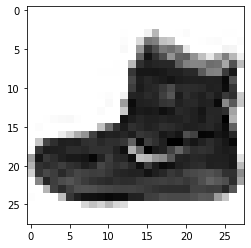

In [46]:
plt.imshow(train_input[0],cmap='gray_r')
plt.show()

In [48]:
inputs=train_input[0:1].reshape(-1,28,28,1)/255.0
feature_maps= conv_acti.predict(inputs)

In [49]:
feature_maps


array([[[[0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.00635361],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.00635361],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.00635361],
         ...,
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.00635361],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.00635361],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.00635361]],

        [[0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.00635361],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.00635361],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.00635361],
         ...,
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.0

In [50]:
print(feature_maps.shape)

(1, 28, 28, 32)


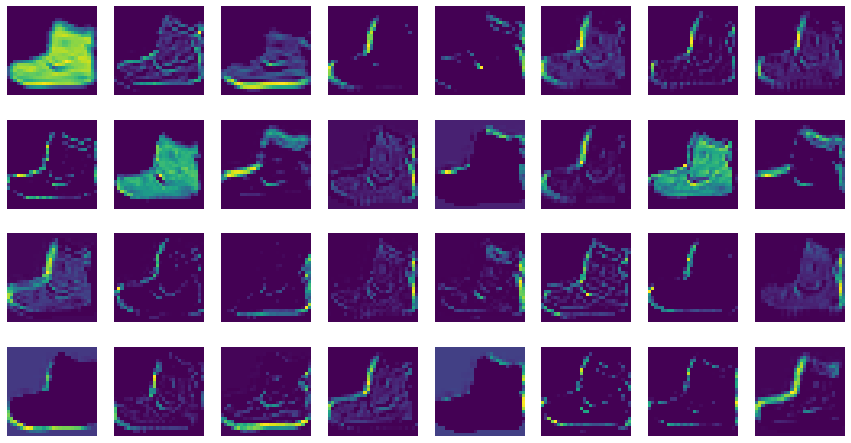

In [52]:
fig, axs= plt.subplots(4,8, figsize=(15,8))
for i in range(4):
  for j in range(8):
    axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
    axs[i,j].axis('off')
plt.show()

In [58]:
conv2_acti= keras.Model(model.input, model.layers[2].output)
inputs=train_input[0:1].reshape(-1,28,28,1)/255.0
feature_maps=conv2_acti.predict(inputs)

In [59]:
print(feature_maps.shape)

(1, 14, 14, 64)


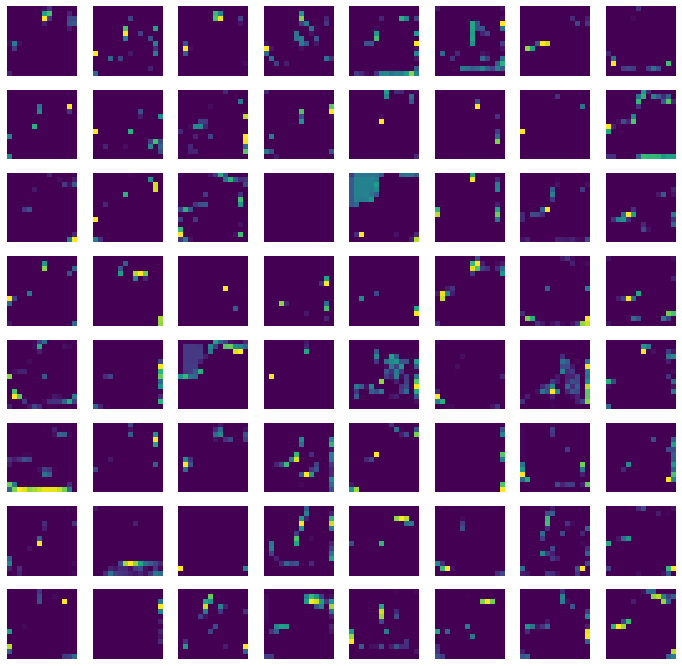

In [60]:
fig, axs= plt.subplots(8,8, figsize=(12,12))
for i in range(8):
  for j in range(8):
    axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
    axs[i,j].axis('off')
plt.show()